In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/Bank Customer Churn Prediction.csv')

df = pd.get_dummies(df, columns=['country'])
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

features = ['credit_score', 'gender', 'age', 'tenure', 'balance',
    'products_number', 'credit_card', 'active_member', 'estimated_salary',
    'country_France', 'country_Germany', 'country_Spain']
target = 'churn'

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
y_res.value_counts(normalize=True)

churn
0    0.5
1    0.5
Name: proportion, dtype: float64

In [4]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
model = RandomForestClassifier(random_state=42)

params = {
    "n_estimators": randint(10, 200),
    "max_depth": randint(1, 10),
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 11),
}

random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=100, cv=5, scoring='accuracy', random_state=42)

random_search.fit(X_res, y_res)

print("Best hyperparameters:", random_search.best_params_)

Best hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 80}


In [3]:
from utils import base_model, feature_importance

In [4]:
best_params = {
    "n_estimators": 80,
    "max_depth": 9,
    "min_samples_split": 10,
    "min_samples_leaf": 1,
}

model = base_model(X_res, y_res, best_params)

Accuracy: 0.8691
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1303
           1       0.87      0.86      0.86      1240

    accuracy                           0.87      2543
   macro avg       0.87      0.87      0.87      2543
weighted avg       0.87      0.87      0.87      2543



In [5]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

Accuracy: 0.8270
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1607
           1       0.55      0.67      0.60       393

    accuracy                           0.83      2000
   macro avg       0.73      0.77      0.75      2000
weighted avg       0.84      0.83      0.83      2000



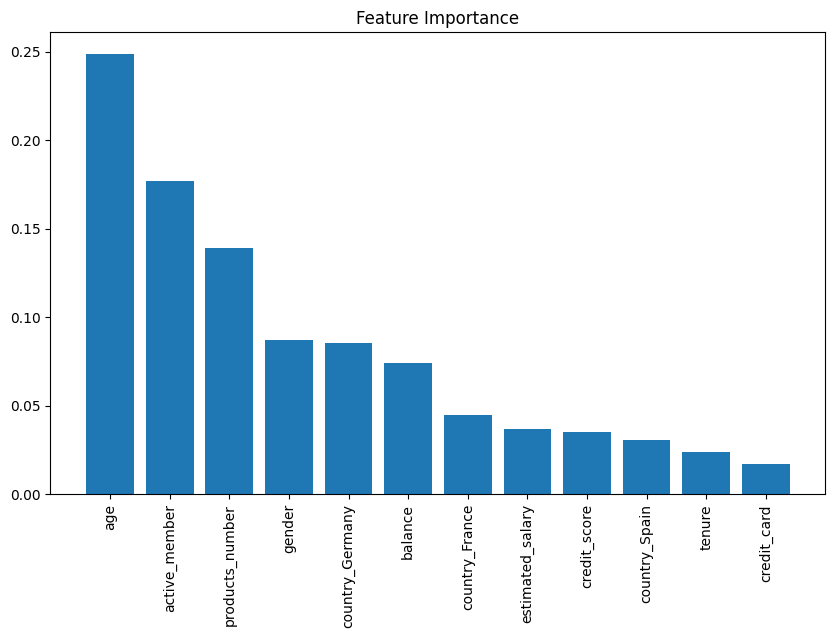

In [6]:
feature_importance(model, X_res)